/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
 1/44 ━━━━━━━━━━━━━━━━━━━━ 14s 347ms/step - loss: 46391021568.0000
Epoch 1: val_loss improved from inf to 40068235264.00000, saving model to house2.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38669152256.0000 - val_loss: 40068235264.0000
Epoch 2/2000
 1/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39409774592.0000
Epoch 2: val_loss improved from 40068235264.00000 to 39161876480.00000, saving model to house2.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37962584064.0000 - val_loss: 39161876480.0000
Epoch 3/2000
 1/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27146121216.0000
Epoch 3: val_loss improved from 39161876480.00000 to 36632281088.00000, saving model to house2.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34610057216.0000 - val_loss: 36632281088.0000
Epoch 4/2000
 1/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42118176768.0000
Epoch 4: val_loss improved from 36632281088.00000 to 30273675264.00000, saving model to house2.keras
44/44 ━━━━━━━━━━━━

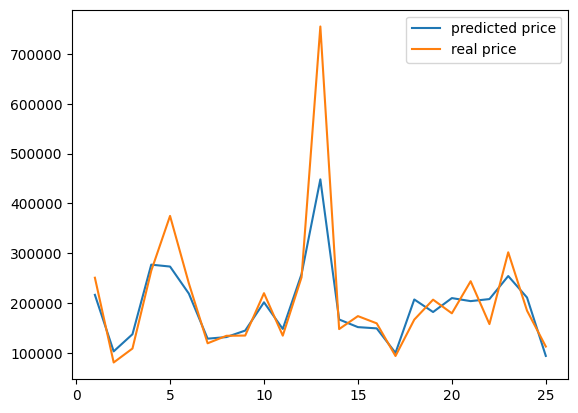

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

#데이터를 불러 옵니다.
df = pd.read_csv("house_data.csv")

#카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.(12장 3절)
df = pd.get_dummies(df)

#결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())

#업데이트된 데이터프레임을 출력해 봅니다.
#df
#집 값을 제외한 나머지 열을 저장합니다.
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

#집 값을 저장합니다.
y = df['SalePrice'].values
X_train_pre=X_train_pre.astype(float)
y=y.astype(float)
#전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)
#모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))  
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.summary()

#모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# n회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15)

# 모델의 이름을 정합니다.
modelpath="house2.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=20, callbacks=[early_stopping_callback, checkpointer])
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []



# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

In [12]:
from tensorflow.keras.models import load_model

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2, shuffle=False)

model = load_model('house1.keras')
print('테스트 loss1 : ', model.evaluate(X_test, y_test) / 10000000)

model = load_model('house2.keras')
print('테스트 loss2 : ', model.evaluate(X_test, y_test) / 10000000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3810161920.0000 
테스트 loss1 :  311.6849152
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4072756224.0000 
테스트 loss2 :  335.177472


In [ ]:
print('테스트 loss', model.evaluate(X_test,y_test)/10000000)



10/10 [==============================] - 0s 2ms/step - loss: 2231532544.0000
테스트 loss 223.1532544
